# Make new compositional diagrams

In [1]:
import flashalgorithm as fc
import numpy as np
import dill as pickle
import itertools as itool
import pdb
import matplotlib.pyplot as plt
import time

In [2]:
def get_stable_phases(x):
    index_get = list()
    color = 'black'
    if np.sum((x[4][0][:, 1] - x[4][0][:, 2])**2) < 1e-8:
        if (x[4][1][1] > x[4][1][2]) and (x[4][1][1] > 1e-10):
            index_get.append(2)
        elif (x[4][1][2] > 1e-10):
            index_get.append(2)
    else:
        if x[4][1][1] > 1e-10:
            index_get.append(1)
        if x[4][1][2] > 1e-10:
            index_get.append(2)
    for ii in [0, 3, 4]:
        if x[4][1][ii] > 1e-10:
            index_get.append(ii)
    if len(index_get) == 2:
        if sorted(index_get) == [0,1]:
            color = 'blue'
        elif sorted(index_get) == [0,2]:
            color = 'green'
        elif sorted(index_get) == [0,3]:
            color = 'pink'
        elif sorted(index_get) == [0,4]:
            color = 'orange'
        elif sorted(index_get) == [1,3]:
            color = 'teal'
        elif sorted(index_get) == [1,4]:
            color = 'gray'
        elif sorted(index_get) == [2,3]:
            color = 'olive'
        elif sorted(index_get) == [3,4]:
            color = 'brown'
        elif sorted(index_get) == [2,4]:
            color = 'purple'
        else:
            color = 'burgundy'
    return index_get, color
def sr2xy(c1, c2=None):
    if type(c1) == np.ndarray:
        x = c1[:, 0] + 0.5 * c1[:, 1]
        y = c1[:, 1] * (np.sqrt(3.0) / 2.0)
        return np.transpose(np.vstack([x, y]))
    else:
        x = c1 + 0.5 * c2
        y = c2 * (np.sqrt(3.0) / 2.0)
        return x, y
def xy2sr(x, y=None):
    if type(x) == np.ndarray:
        c2 = x[:, 1] * (2.0 / np.sqrt(3.0))
        c1 = x[:, 0] - 0.5 * c2
        c3 = 1 - c2 - c3
        return np.transpose(np.vstack([c1, c2, c3]))
    else:
        c2 = y * (2.0 / np.sqrt(3.0))
        c1 = x - 0.5 * c2
        c3 = 1 - c2 - c1
        return c1, c2, c3
def ctoxyz(c1, c2=None, c3=None):
    if type(c1) == np.ndarray:
        x = 0.5 * (c1[:, 0] + c1[:, 2]) + c1[:, 1]
        y = c1[:, 0] * (np.sqrt(3.0) / 2.0) + c1[:, 2] * (1 / (2.0 * np.sqrt(3.0)))
        z = c1[:, 0] * np.sqrt(2.0 / 3.0)
        return np.transpose(np.vstack([x, y, z]))
    else:
        x = 0.5 * (c1 + c3) + c2
        y = c1 * (np.sqrt(3.0) / 2.0) + c3 * (1 / (2.0 * np.sqrt(3.0)))
        z = c3 * np.sqrt(2.0 / 3.0)
        return x, y, z
def xyztoc(x, y=None, z=None):
    if type(x) == np.ndarray:
        c3 = x[:, 2] * np.sqrt(3.0 / 2.0)
        c1 = (x[:, 1] - c3 * (1 / (2.0 * np.sqrt(3.0)))) * (2.0 / np.sqrt(3.0))
        c2 = x[:, 0] - 0.5 * (c1 + c3)
        c4 = 1 - c1 - c2 - c3
        return np.transpose(np.vstack([c1, c2, c3, c4]))
    else:
        c3 = z * np.sqrt(3.0 / 2.0)
        c1 = (y - c3 * (1 / (2.0 * np.sqrt(3.0)))) * (2.0 / np.sqrt(3.0))
        c2 = x - 0.5 * (c1 + c3)
        c4 = 1 - c1 - c2 - c3
        return c1, c2, c3, c4

color_dict = {0: 'blue',
              1: 'red',
              2: 'purple',
              3: 'black',
              4: 'orange'}

In [3]:
data_str = '80bar12C'
data = []
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_Aqs1s2.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_Aqs1s2_nearc1.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_Aqs1s2_nearc1_pt2.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_LVs1.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_LVs2.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_AqLs2.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_AqLs1.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_Ls1s2.pkl', 'rb'))





data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_LVs2.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_AqLs1.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_AqLs2.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_Ls1s2.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_Aqs1s2.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_nearc1.pkl', 'rb')) # Produces Aq-V/L-s2
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase2.pkl', 'rb'))  # Not useful
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase3.pkl', 'rb'))  # Not useful
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase4.pkl', 'rb'))  # Not useful
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase5.pkl', 'rb'))  # Useful for filling in Aqs1s2
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase6.pkl', 'rb'))  # Useful, but redundant
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase7.pkl', 'rb'))  # Useful, but redundant
#DONE: Drop Bad compositions: x[0] = 170, 171 of quick_nearc1...they both produce L-V-s2, when independent analysis suggest Aq-V/L-s2
#DONE: Drop Bad compositions x[0] = 5168 of pt_new1...totally erroneous.
#DONE: Remove bad compositions nearc1 of pt_new1 if propane != 0.
#TODO: Add zero propane Aq-L/V-s2 because it is absent.
data += pickle.load(open('80bar12C_addedcomps_1pt.pkl', 'rb'))
threep_data = [x for x in data if (x[4] != []) and (x[-1][-1] < 4e-5)]

data += pickle.load(open('c1toc3_flashtable_' + data_str + '_pt_new1.pkl', 'rb'))
all3_data = [x for x in data if (x[4] != []) and (x[-1][-1] < 4e-5)]
really_broken = [x for x in data if x[4] == []]
broken = [x for x in data if (x[4] != []) and ((x[-1][-1] > 1e-6) or (x[-1][-1] == 100))]

In [4]:
len(all3_data)
all3_data[-2:]
max_h2o = np.max([x[4][0][0,:] for x in all3_data])
min_h2o = np.min([x[4][0][0,:] for x in all3_data])
h2o_stats = {'max': max_h2o, 'min': min_h2o}
print(h2o_stats)

{'max': 0.99968153952557504, 'min': 0.00012846076728059092}


In [5]:
def make_ref_list(data):
    phase_stable_lookup = dict()
    type_ref_list = list()
    phase_type = 0
    for ii, x in enumerate(data):
        index_get, color = get_stable_phases(x)
        if sorted(index_get) in type_ref_list:
            phase_stable_lookup[type_ref_list.index(sorted(index_get))]['inds'].append(ii)
        else:
            phase_stable_lookup[phase_type] = {'phases': sorted(index_get), 'inds': [ii], 'color': color}
            phase_type += 1
            type_ref_list.append(sorted(index_get))
    return type_ref_list, phase_stable_lookup
type_ref_list, phase_stable_lookup = make_ref_list(all3_data)

In [6]:
def plot_tern_lines(x, tern_inds=[0,1,2]):
    z = x[4][0]
    absent_ind = [ind for ind in range(4) if ind not in tern_inds].pop()
    if (np.sum(x[1][tern_inds]) == 1) or (x[1][absent_ind] == 0.0):
        index_get, color = get_stable_phases(x)
        if x[-1][-1] < 5e-5:
            if (len(index_get) == 2) and (color != 'black'):
                if (len(z) == 3) or (x[1][tern_inds[2]] == 0.0):
                    x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                    x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
                else:
                    x1, y1 = sr2xy(0, z[0, index_get[0]])
                    x2, y2 = sr2xy(0, z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
            elif len(index_get) == 3:
                x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                x3, y3 = sr2xy(z[1, index_get[2]], z[0, index_get[2]])
                plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-r')
                
def plot_3d_tietri(index_interest, color, tie=False):
    x_line = dict([('1', []), ('2', []), ('3', [])])
    y_line = dict([('1', []), ('2', []), ('3', [])])
    z_line = dict([('1', []), ('2', []), ('3', [])])
    triangles = list()
    if sorted(index_interest) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset:
            if (x[-1][-1] < 1e-5):
                z = x[4][0]
                if (len(z) == 4) or (x[1][3] == 0):
                    x1, y1, z1 = ctoxyz(z[2, index_interest[0]], z[1, index_interest[0]], z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(z[2, index_interest[1]], z[1, index_interest[1]], z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(z[2, index_interest[2]], z[1, index_interest[2]], z[0, index_interest[2]])
                elif x[1][2] == 0.0:
                    x1, y1, z1 = ctoxyz(0, z[1, index_interest[0]], z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(0, z[1, index_interest[1]], z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(0, z[1, index_interest[2]], z[0, index_interest[2]])
                elif x[1][1] == 0.0:
                    x1, y1, z1 = ctoxyz(z[1, index_interest[0]], 0, z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(z[1, index_interest[1]], 0, z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(z[1, index_interest[2]], 0, z[0, index_interest[2]])
                triangles.append([[x1, x2, x3, x1], [y1, y2, y3, y1], [z1, z2, z3, z1]])
                z_line['1'].append(z1)
                z_line['2'].append(z2)
                z_line['3'].append(z3)

                y_line['1'].append(y1)
                y_line['2'].append(y2)
                y_line['3'].append(y3)

                x_line['1'].append(x1)
                x_line['2'].append(x2)
                x_line['3'].append(x3)

        if (x_line['1'] != []):
            if tie:
                for tietri in triangles:
                    ax.plot(tietri[0], tietri[1], tietri[2], '-', color=color)
            ax.plot(x_line['1'], y_line['1'], z_line['1'], '.', color=color_dict[index_interest[0]])
            ax.plot(x_line['2'], y_line['2'], z_line['2'], '.', color=color_dict[index_interest[1]])
            ax.plot(x_line['3'], y_line['3'], z_line['3'], '.', color=color_dict[index_interest[2]])
            
def plot_3d_4phase(index_interest):
    if sorted(index_interest) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset[0:1]:
            if (x[4][3] != 1000) and (x[-1][-1] < 1e-5):
                z = x[4][0]
                x1, y1, z1 = ctoxyz(z[2, index_interest[0]], z[1, index_interest[0]], z[0, index_interest[0]])
                x2, y2, z2 = ctoxyz(z[2, index_interest[1]], z[1, index_interest[1]], z[0, index_interest[1]])
                x3, y3, z3 = ctoxyz(z[2, index_interest[2]], z[1, index_interest[2]], z[0, index_interest[2]])
                x4, y4, z4 = ctoxyz(z[2, index_interest[3]], z[1, index_interest[3]], z[0, index_interest[3]])
                ax.plot([x1, x2], [y1, y2], [z1, z2], '-', color='pink')
                ax.plot([x2, x3], [y2, y3], [z2, z3], '-', color='pink')
                ax.plot([x3, x1], [y3, y1], [z3, z1], '-', color='pink')
                ax.plot([x4, x1], [y4, y1], [z4, z1], '-', color='pink')
                ax.plot([x4, x2], [y4, y2], [z4, z2], '-', color='pink')
                ax.plot([x4, x3], [y4, y3], [z4, z3], '-', color='pink')
def plot_pseudo_4phase(index_mod):
    if sorted(index_mod) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_mod))]['inds']]
        for x in data_subset[0:1]:
            if (x[4][3] != 10-0) and (x[-1][-1] < 1e-5):
                z = x[4][0]
                z_p = z[1:, :] / np.sum(z[1:, :], 0)[np.newaxis, :]
                x1, y1 = sr2xy(z_p[0, index_mod[0]], z_p[2, index_mod[0]])
                x2, y2 = sr2xy(z_p[0, index_mod[1]], z_p[2, index_mod[1]])
                x3, y3 = sr2xy(z_p[0, index_mod[2]], z_p[2, index_mod[2]])
                x4, y4 = sr2xy(z_p[0, index_mod[3]], z_p[2, index_mod[3]])
                plt.plot([x1, x2], [y1, y2], '--', color='pink')
                plt.plot([x2, x3], [y2, y3], '--', color='pink')
                plt.plot([x3, x1], [y3, y1], '--', color='pink')
                plt.plot([x4, x1], [y4, y1], '--', color='pink')
                plt.plot([x4, x2], [y4, y2], '--', color='pink')
                plt.plot([x4, x3], [y4, y3], '--', color='pink')
def plot_pseudo_tern(index_interest):
    if sorted(index_interest) in type_ref_list:
        x_line = dict([('0', []), ('1', []), ('2', [])])
        y_line = dict([('0', []), ('1', []), ('2', [])])
    #     triangles = list()
#         index_mod = [ind for ind in index_interest if ind !=0]
        index_mod = [ind for ind in index_interest]

        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset:
            if (x[4][3] != 1000) and (x[-1][-1] < 5e-5):
                z = x[4][0]
                z_p = z[1:, :] / np.sum(z[1:, :], 0)[np.newaxis, :]
                if (len(z_p) == 3):
                        x0, y0 = sr2xy(z_p[0, index_mod[0]], z_p[2, index_mod[0]])
                        x1, y1 = sr2xy(z_p[0, index_mod[1]], z_p[2, index_mod[1]])
                        if len(index_mod) == 3:
                            x2, y2 = sr2xy(z_p[0, index_mod[2]], z_p[2, index_mod[2]])
                else:
                    if x[1][2] == 0.0:
                            x0, y0 = sr2xy(z_p[0, index_mod[0]], z_p[1, index_mod[0]])
                            x1, y1 = sr2xy(z_p[0, index_mod[1]], z_p[1, index_mod[1]])
                            if len(index_mod) == 3:
                                x2, y2 = sr2xy(z_p[0, index_mod[2]], z_p[1, index_mod[2]])
                    elif x[1][1] == 0.0:
                            x0, y0 = sr2xy(0, z_p[1, index_mod[0]])
                            x1, y1 = sr2xy(0, z_p[1, index_mod[1]])
                            if len(index_mod) == 3:
                                x2, y2 = sr2xy(0, z_p[1, index_mod[2]])
                    elif x[1][3] == 0.0:
                            x0, y0 = sr2xy(z_p[0, index_mod[0]], 0)
                            x1, y1 = sr2xy(z_p[0, index_mod[1]], 0)
                            if len(index_mod) == 3:
                                x2, y2 = sr2xy(z_p[0, index_mod[2]], 0) 
                y_line['0'].append(y0)
                y_line['1'].append(y1)
                if len(index_mod) == 3:
                    y_line['2'].append(y2)
                x_line['0'].append(x0)
                x_line['1'].append(x1)
                if len(index_mod) == 3:
                    x_line['2'].append(x2)
        if (x_line['1'] != []):
            plt.plot(x_line['0'], y_line['0'], '.', color=color_dict[index_mod[0]])
            plt.plot(x_line['1'], y_line['1'], '.', color=color_dict[index_mod[1]])
            if len(index_mod) == 3:
                plt.plot(x_line['2'], y_line['2'], '.', color=color_dict[index_mod[2]])

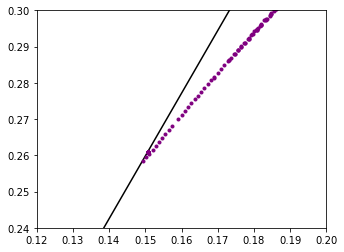

In [7]:
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')

# Excess Water Terns
# plot_pseudo_tern([0, 1, 3])
plot_pseudo_tern([0, 2, 3])
# plot_pseudo_tern([0, 1, 4])
# plot_pseudo_tern([0, 2, 4])
# plot_pseudo_tern([3, 4, 0])
# plot_pseudo_tern([0, 1, 2])


# Excess Gas Terns
# plot_pseudo_tern([1, 2, 3])
# plot_pseudo_tern([1, 3, 2])
# plot_pseudo_tern([1, 2, 4])
# plot_pseudo_tern([4, 2, 1])


# plot_pseudo_tern([1, 4, 2])
# plot_pseudo_tern([1, 3, 4])
# plot_pseudo_tern([2, 3, 4])
# plot_pseudo_tern([1, 4, 3])
# plot_pseudo_tern([2, 4, 3])
# plot_pseudo_tern([0, 1, 2])

# Possible 4-phase
plot_pseudo_4phase([1, 2, 3, 4])
plot_pseudo_4phase([0, 2, 3, 4])
plot_pseudo_4phase([0, 1, 3, 4])
plot_pseudo_4phase([0, 1, 2, 3])
plot_pseudo_4phase([0, 1, 2, 4])










plt.axis('scaled')
# plt.text(-0.06, 0, 'C2')
# plt.text(1.0, 0, 'C1')
# plt.text(0.5, 0.87, 'C3')

# plt.ylim([0.7, 0.85])
# plt.xlim([0.4, 0.6])

# plt.ylim([-0.01, 0.05])
# plt.xlim([0.95, 1.05])

# plt.ylim([-0.01, 0.1])
# plt.xlim([0.8, 1.1])

# plt.ylim([-0.01, 0.05])
# plt.xlim([0.5, 0.8])

plt.ylim([0.24, 0.3])
plt.xlim([0.12, 0.2])



plt.savefig('test2.svg')
plt.show()

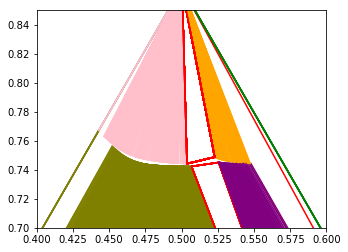

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
c1c2_inds = [0, 1, 2]
c1c3_inds = [0, 1, 3]
c2c3_inds = [0, 2, 3]
tern_inds = c1c2_inds
for x in all3_data:
    plot_tern_lines(x, tern_inds=tern_inds)
# extra_data = pickle.load(open('c1c3_1comp.pkl', 'rb'))
# plot_tern_lines([0, 0, 0, 0, extra_data])
plt.axis('scaled')
# plt.text(-0.06, 0, 'C' + str(tern_inds[2]))
# plt.text(1.0, 0, 'C' + str(tern_inds[1]))



plt.ylim([0.7, 0.85])
plt.xlim([0.4, 0.6])

# plt.ylim([0.85, 0.88])
# plt.xlim([0.48, 0.52])

# plt.ylim([-0.01, 0.4])
# plt.xlim([0.8, 1.1])
plt.savefig('test.svg')
plt.show()

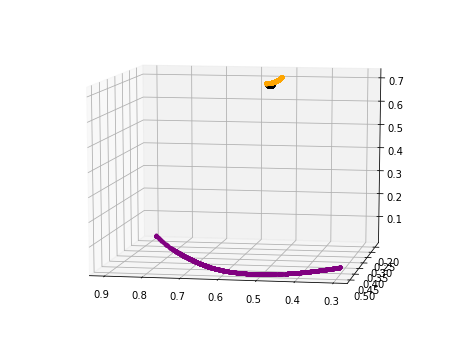

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import itertools as itool
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
# vertices = [[1, 0, 0, 0],
#             [0, 1, 0, 0],
#             [0, 0, 1, 0],
#             [0, 0, 0, 1]]
# pts = [ctoxyz(x[0], x[1], x[2]) for x in vertices]
# pt_pairs = itool.combinations(range(4), 2)
# for pair in pt_pairs:
#     ax.plot([pts[pair[0]][0], pts[pair[1]][0]],
#             [pts[pair[0]][1], pts[pair[1]][1]],
#             [pts[pair[0]][2], pts[pair[1]][2]], 'k-')
# ax.text(pts[0][0], pts[0][1], pts[0][2], 'C2')
# ax.text(pts[1][0], pts[1][1], pts[1][2], 'C1')
# ax.text(pts[3][0], pts[3][1], pts[3][2], 'C3')


# plot_3d_tietri([0, 1, 3], 'orange', tie=False)
# plot_3d_tietri([0, 1, 4], 'red', tie=False)
# plot_3d_tietri([1, 3, 4], 'blue', tie=False)
plot_3d_tietri([2, 3, 4], 'brown', tie=False)
# plot_3d_tietri([0, 1, 2], 'green', tie=False)
# plot_3d_tietri([1, 2, 4], 'teal', tie=False)
# plot_3d_tietri([1, 2, 3], 'olive', tie=False)
# plot_3d_tietri([0, 3, 4], 'gray', tie=False)
# plot_3d_tietri([0, 2, 4], 'gray', tie=False)
# plot_3d_tietri([0, 2, 3], 'purple', tie=False)


# plot_3d_4phase([1, 2, 3, 4])
# plot_3d_4phase([0, 2, 3, 4])
# plot_3d_4phase([0, 1, 3, 4])






ax.view_init(10, 100)
plt.show()

In [10]:
ref_list, phase_stable_lookup = make_ref_list(all3_data)
zip(range(len(ref_list)),ref_list)

[(0, [1, 2, 4]),
 (1, [1, 4]),
 (2, [2, 4]),
 (3, [0, 2, 3, 4]),
 (4, [0, 2, 3]),
 (5, [0, 2, 4]),
 (6, [2, 3, 4]),
 (7, [2, 3]),
 (8, [0, 2]),
 (9, [0, 3, 4]),
 (10, [0, 4]),
 (11, [0, 3])]

In [11]:
index_get = 1
data_subset = [all3_data[i] for i in phase_stable_lookup[index_get]['inds']]
data_subset

[[148,
  array([ 0.28709796,  0.36710953,  0.23755342,  0.1082391 ]),
  ('water', 'methane', 'ethane', 'propane'),
  array([ 0.28709796,  0.36710953,  0.23755342,  0.1082391 ]),
  [array([[  9.98054913e-01,   1.89874411e-04,   1.89704443e-04,
             8.57780211e-01,   8.60930949e-01],
          [  1.40080156e-03,   5.05748250e-01,   5.05072780e-01,
             6.64435266e-02,   8.98239544e-02],
          [  4.51375691e-04,   3.48721455e-01,   3.49029135e-01,
             7.57137311e-02,   1.52108241e-02],
          [  9.29094161e-05,   1.45340421e-01,   1.45708380e-01,
             6.25312125e-05,   3.40342726e-02]]),
   array([ 0.        ,  0.66667318,  0.        ,  0.        ,  0.33332682]),
   array([[  4.69931448e+03,   1.00000000e+00,   9.99124666e-01,
             4.28520155e+03,   4.53421261e+03],
          [  2.47621722e-03,   1.00000000e+00,   9.98694012e-01,
             1.31376681e-01,   1.77606061e-01],
          [  1.15719357e-03,   1.00000000e+00,   1.00086273e+00,


In [12]:
index_mdpt = ref_list[index_get]
comp_ind_dict = {'water': 0,
                 'methane': 1,
                 'ethane': 2,
                 'propane': 3}
        
def make_midpoint(xx, index):
    mean_pts = np.mean(xx[4][0][:, index], axis=1)
    if len(xx[2]) == 4:
        return mean_pts
    else:
        result = np.zeros([4])
        for ii in range(len(xx[2])):
            result[comp_ind_dict[xx[2][ii]]] = mean_pts[ii]
        return result
    
def make_full_mat(xx, index):
    data_mod = xx[4][0][:, index]
    if len(xx[2]) == 4:
        return data_mod
    else:
        result = np.zeros([4, len(index)])
        for ii in range(len(xx[2])):
            result[comp_ind_dict[xx[2][ii]], :] = data_mod[ii, :]
        return result
    
def prepare_3phase_data(data):
    phase_zone_dict = dict()
    ii = 0
    jj = 0
    ref_list, phase_stable_lookup = make_ref_list(data)
    while ii < len(ref_list):
        phase_inds = ref_list[ii]
        if len(phase_inds) == 3:
            data_subset = [data[i] for i in phase_stable_lookup[ii]['inds']]
            data_subsetfull = np.asarray([make_full_mat(x, phase_inds) for x in data_subset])
            reduce_cond = np.ones([len(data_subsetfull)], dtype=bool)
            
            # Manually setting up the reduce condition
            if phase_inds == [0, 2, 4]:
                data_mdpt = np.mean(data_subsetfull, axis=2)
                reduce_cond = data_mdpt[:, 1] / np.sum(data_mdpt[:, 1:], axis=1) > 0.8
                data_3phase = np.unique(data_subsetfull[reduce_cond, :, :], axis=0)
                data_3phase = data_3phase[np.argsort(np.unique(data_3phase, axis=2)[:, 1, 1]), :, :]
                phase_zone_dict[jj] = {'inds': phase_inds,
                                       'data': data_3phase,
                                       'h2o_stats': {'max': np.max(data_3phase[0,:,:]), 
                                                     'min': np.min(data_3phase[0,:,:])}}
                jj += 1
                
                data_3phase = np.unique(data_subsetfull[~reduce_cond, :, :], axis=0)
                data_3phase = data_3phase[np.argsort(np.unique(data_3phase, axis=2)[:, 1, 1]), :, :]
                phase_zone_dict[jj] = {'inds': phase_inds,
                                       'data': data_3phase,
                                       'h2o_stats': {'max': np.max(data_3phase[0,:,:]), 
                                                     'min': np.min(data_3phase[0,:,:])}}
                jj += 1
            else:   
                data_3phase = np.unique(data_subsetfull[reduce_cond, :, :], axis=0)
                data_3phase = data_3phase[np.argsort(data_3phase[:, 1, 1]), :, :]
                phase_zone_dict[jj] = {'inds': phase_inds,
                                       'data': data_3phase,
                                       'h2o_stats': {'max': np.max(data_3phase[0,:,:]), 
                                                     'min': np.min(data_3phase[0,:,:])}}
                jj += 1
        ii += 1
    return phase_zone_dict

def prepare_2phase_data(data):
    phase_zone_dict = dict()
    ii = 0
    jj = 0
    ref_list, phase_stable_lookup = make_ref_list(data)
    while ii < len(ref_list):
        phase_inds = ref_list[ii]
        if len(phase_inds) == 2:
            data_subset = [data[i] for i in phase_stable_lookup[ii]['inds']]
            data_subsetfull = np.asarray([make_full_mat(x, phase_inds) for x in data_subset])
            data_2phase = np.unique(data_subsetfull, axis=0)
            data_2phase = data_2phase[np.argsort(np.unique(data_2phase, axis=2)[:, 1, 1]), :, :]
            phase_zone_dict[jj] = {'inds': phase_inds,
                                   'data': data_2phase,
                                   'h2o_stats': {'max': np.max(data_2phase[0,:,:]), 
                                                 'min': np.min(data_2phase[0,:,:])}}
            jj += 1
        ii += 1
    return phase_zone_dict

def prepare_4phase_data(data):
    phase_zone_dict = dict()
    ii = 0
    jj = 0
    ref_list, phase_stable_lookup = make_ref_list(data)
    while ii < len(ref_list):
        phase_inds = ref_list[ii]
        if len(phase_inds) == 4:
            data_subset = [data[i] for i in phase_stable_lookup[ii]['inds']]
            data_subsetfull = np.asarray([make_full_mat(x, phase_inds) for x in data_subset])
            data_4phase = np.mean(data_subsetfull, axis=0)
            phase_zone_dict[jj] = {'inds': phase_inds,
                                   'data': data_4phase,
                                   'h2o_stats': {'max': np.max(data_4phase[0,:]), 
                                                 'min': np.min(data_4phase[0,:])}}
            jj += 1
        ii += 1
    return phase_zone_dict
# from numpy.linalg import norm

# def area(a, b, c) :
#     return 0.5 * norm( np.cross( b-a, c-a ) )
# data_subsetfull = np.asarray([make_full_mat(x, index_mdpt) for x in data_subset])
# data_mdpt = np.mean(data_subsetfull, axis=2)
# reduce_cond = np.ones([len(data_mdpt)], dtype=bool) 
# reduce_cond = ((data_subsetfull[:, 3, 0] / np.sum(data_subsetfull[:, 1:,0], axis=1) < 1e-5) 
#                & (data_subsetfull[:, 1, 0] / np.sum(data_subsetfull[:, 1:,0], axis=1) > 0.8))
# reduce_cond = data_mdpt[:, 1] / np.sum(data_mdpt[:, 1:], axis=1) > 0.8

# data_mdpt = np.unique(data_mdpt[reduce_cond, :], axis=0)
# data_3phase = np.unique(data_subsetfull[reduce_cond, :, :], axis=2)
# all_data_cond = [data_subset[ii] for ii, cond in enumerate(reduce_cond) if cond]
# # all_data_cond
# # list_of_bad = [x[0] for x in all_data_cond]
# # pickle.dump(list_of_bad, open('remove_list.pkl', 'w'))
# data_mdpt
# # start_pt = np.mean(data_mdpt[-10:-9,:], axis=0)
# # new_frac = 0.61
# # old_frac = start_pt[0]
# # new_pt = np.asarray([new_frac, 
# #                     (1-new_frac)*start_pt[1]/old_frac,
# #                     (1-new_frac)*start_pt[2]/old_frac,
# #                      (1-new_frac)*start_pt[3]/old_frac])
# data_mpdt = data_mdpt[np.argsort(data_mdpt[:, 1]), :]
# data_3phase = data_3phase[np.argsort(data_3phase[:, 1, 1]), :, :]
phase_3_dict = prepare_3phase_data(threep_data)
phase_2_dict = prepare_2phase_data(all3_data)
phase_4_dict = prepare_4phase_data(all3_data)

In [13]:
# data_mdpt_xyz = np.asarray([ctoxyz(*x[:-1]) for x in data_mdpt])
# data_mdpt_xyz.shape
# data_mdpt_xyz2 = ctoxyz(data_mdpt)
# data_mdpt_xyz2.shape
phase_4_dict[0]['data'].shape
phase_3_dict[0]

{'data': array([[[  2.09276950e-04,   1.71006708e-04,   8.59812210e-01],
         [  6.58550501e-01,   4.70375573e-01,   9.08933402e-02],
         [  1.72370052e-01,   2.14181283e-01,   6.63760410e-03],
         [  1.68870171e-01,   3.15272137e-01,   4.26568458e-02]],
 
        [[  2.09251872e-04,   1.71001802e-04,   8.59795842e-01],
         [  6.58426127e-01,   4.70376024e-01,   9.09104197e-02],
         [  1.72530293e-01,   2.14355088e-01,   6.64179226e-03],
         [  1.68834329e-01,   3.15097886e-01,   4.26519460e-02]],
 
        [[  2.09407062e-04,   1.70869914e-04,   8.59778021e-01],
         [  6.60512124e-01,   4.70376272e-01,   9.09278869e-02],
         [  1.69842601e-01,   2.11431737e-01,   6.52140239e-03],
         [  1.69435868e-01,   3.18021121e-01,   4.27726897e-02]],
 
        ..., 
        [[  1.93580011e-04,   1.85917735e-04,   8.60762561e-01],
         [  5.28238752e-01,   4.96877346e-01,   8.99824223e-02],
         [  3.23930644e-01,   3.37231157e-01,   1.39293235e

In [14]:
# pickle.dump(data_mdpt, open('practice_three_phase_data.pkl', 'w'))

In [15]:
# TODO: Fix this so that only one of these are spline interpolated. 
#       Then, re-interpolate onto a range representing the full extent of the array.
def make_3p_splines(data_3phase):
    from scipy.interpolate import splprep, splrep, splev
#     tck0, u0 = splprep([data_3phase[:, 0, 0], 
#                         data_3phase[:, 1, 0],
#                         data_3phase[:, 2, 0], 
#                         data_3phase[:, 3, 0]])
    tck1, u1 = splprep([data_3phase[:, 0, 1], 
                        data_3phase[:, 1, 1], 
                        data_3phase[:, 2, 1],
                        data_3phase[:, 3, 1]])
#     tck2, u2 = splprep([data_3phase[:, 0, 2],
#                         data_3phase[:, 1, 2],
#                         data_3phase[:, 2, 2],
#                         data_3phase[:, 3, 2]],
#                         nest=-1)
#     return tck0, tck1, tck2
    return tck1

def create_lookup(tck1, data):
    from scipy.interpolate import splprep, splrep, splev
    def threephase_lookup(gamma):
        phase1 = np.squeeze(np.transpose(np.asarray(splev(gamma, tck1))))
        index = np.interp(phase1[1], data[:, 1, 1], np.arange(len(data)))
        phase0 = np.transpose(np.asarray([np.interp(index, np.arange(len(data)), data[:, ii, 0]) for ii in range(4)]))
        phase2 = np.transpose(np.asarray([np.interp(index, np.arange(len(data)), data[:, ii, 2]) for ii in range(4)]))
#         phase1 = np.transpose(np.asarray(splev(gamma, tck1)))
#         phase2 = np.transpose(np.asarray(splev(gamma, tck2)))
        return np.dstack([phase0, phase1, phase2])
    return threephase_lookup

# def create_lookup(tck0, tck1, tck2):
#     from scipy.interpolate import splprep, splrep, splev
#     def threephase_lookup(gamma):
#         if gamma == []:
#             pdb.set_trace()
#         phase0 = np.transpose(np.asarray(splev(gamma, tck0)))
#         phase1 = np.transpose(np.asarray(splev(gamma, tck1)))
#         phase2 = np.transpose(np.asarray(splev(gamma, tck2)))
#         return np.dstack([phase0, phase1, phase2])
#     return threephase_lookup

# def create_lookup(tck0, tck1, tck2):
#     from scipy.interpolate import splprep, splrep, splev
#     x_evals = np.linspace(0, 1, 5000)
#     phase0 = np.transpose(np.asarray(splev(x_evals, tck0)))
#     phase1 = np.transpose(np.asarray(splev(x_evals, tck1)))
#     phase2 = np.transpose(np.asarray(splev(x_evals, tck2)))
#     def threephase_lookup(gamma):
#         phase0_out = np.transpose(np.asarray([np.interp(gamma, x_evals, phase0[:, ii]) for ii in range(4)]))
#         phase1_out = np.transpose(np.asarray([np.interp(gamma, x_evals, phase1[:, ii]) for ii in range(4)]))
#         phase2_out = np.transpose(np.asarray([np.interp(gamma, x_evals, phase2[:, ii]) for ii in range(4)]))
#         return np.dstack([phase0_out, phase1_out, phase2_out])
#     return threephase_lookup

# for key in phase_3_dict.keys():
#     data_3phase = phase_3_dict[key]['data']
#     tck0, tck1, tck2= make_3p_splines(data_3phase)
#     mat_lookup = create_lookup(tck0, tck1, tck2)
#     phase_3_dict[key]['spline'] = (tck0, tck1, tck2)
#     phase_3_dict[key]['lookup'] = mat_lookup
    
for key in phase_3_dict.keys():
    data_3phase = phase_3_dict[key]['data']
    tck0 = make_3p_splines(data_3phase)
    mat_lookup = create_lookup(tck0, data_3phase)
    phase_3_dict[key]['spline'] = (tck0)
    phase_3_dict[key]['lookup'] = mat_lookup
    
def define_3phase_plane(data):
    A_vec = data[:, :-1, 0] - data[:, :-1, 2]
    B_vec = data[:, :-1, 1] - data[:, :-1, 2]
    return np.cross(A_vec, B_vec)

def define_z_vec(z, data):
    vec = data[:, :-1, 1] - z[:-1][np.newaxis, :]
    return vec

def find_gamma(gamma, z, phase_info):
    if type(gamma) == np.float:
        output = np.zeros(1)
        gamma = np.asarray([gamma])
    else:
        output = np.zeros(len(gamma))
    use_inds = (gamma<1.0)&(gamma>0.0)
    output[~use_inds] = 1e2
    if np.sum(use_inds) > 0:
        gamma_use = gamma[use_inds]
        tie_tri_data = phase_info['lookup'](gamma_use)
        tie_tri_vec = define_3phase_plane(tie_tri_data)
        z_vec = define_z_vec(z, tie_tri_data)
        output[use_inds] = np.sum(tie_tri_vec * z_vec, axis=1)
        output[use_inds] += 1e2*((gamma[use_inds] < 0) | (gamma[use_inds] > 1))
    return output 
from scipy.optimize import fsolve, root, newton
# This may be inefficient with regards to needing to iterate over
def gamma_cross(z, phase_info):
    gamma = fsolve(find_gamma, 0.5, args=(z, phase_info), factor=0.1, maxfev=20)
    return gamma

def tie_tri_func(z, phase_info):
    min_h2o = phase_info['h2o_stats']['min']
    max_h2o = phase_info['h2o_stats']['max']
    if (z[0] < min_h2o) or (z[0] > max_h2o):
        empty_result = np.zeros([4, 3])
        return empty_result, empty_result, 1e6, 1e6
    if (z == 0.0).any():
        get_ind = np.sum((z == 0.0) == (np.sum(phase_info['data'],axis=2) == 0.0), axis=1) == 4
        if np.sum(get_ind) == 0.0:
            empty_result = np.zeros([4, 3])
            return empty_result, empty_result, 1e6, 1e6
        else:
            tie_tri_data = phase_info['data'][get_ind, :, :][0, :, :]
    else:
        gamma = gamma_cross(z, phase_info)
        tie_tri_data = np.squeeze(phase_info['lookup'](gamma))
        tie_tri_data = np.minimum(1.0, np.maximum(0.0, tie_tri_data))
        tie_tri_data = tie_tri_data / np.sum(tie_tri_data, axis=0)[np.newaxis, :]
    alpha = np.linalg.lstsq(tie_tri_data, z)[0]
    z_error = np.linalg.norm(np.dot(tie_tri_data, alpha) - z)
    alpha_error = np.linalg.norm(1.0 - np.sum(alpha))
    return tie_tri_data, alpha, z_error, alpha_error
    
# test_pt = np.mean(phase_3_dict[0]['lookup'](0.5), axis=2).flatten()
# test_pt2 = np.mean(phase_3_dict[0]['lookup'](0.8), axis=2).flatten()

# test_data = phase_3_dict[0]['lookup'](0.5)
# z_vec = define_z_vec(test_pt, test_data)
# tie_tri_vec = define_3phase_plane(test_data)
# print(test_pt)
# print(test_pt2)
# print(test_data)
# print(tie_tri_vec, tie_tri_vec.shape)
# print(z_vec, z_vec.shape)
# print(np.inner(tie_tri_vec, z_vec))

# Something wrong with the above. Not sure what it is yet!!!

In [16]:
find_gamma(np.asarray([0.5]), np.asarray([0.2, 0.1, 0.3, 0.4]), phase_3_dict[0])
# phase_3_dict[0]['lookup'](np.asarray([0.5, 0.8]))

array([ 0.02886377])

In [17]:
for outer_key in phase_3_dict.keys():
    rand_gamma = np.random.random([1])
    test_pt = np.mean(phase_3_dict[outer_key]['lookup'](rand_gamma), axis=2).flatten()
    result = [(key, tie_tri_func(test_pt, phase_3_dict[key])) for key in phase_3_dict.keys()]
    print(outer_key, rand_gamma, result)

(0, array([ 0.14399791]), [(0, (array([[  2.06540900e-04,   1.75329507e-04,   8.59978857e-01],
       [  6.37201214e-01,   4.74587259e-01,   9.07368432e-02],
       [  1.98259714e-01,   2.69604266e-01,   8.09060469e-03],
       [  1.64332530e-01,   2.55633146e-01,   4.11936952e-02]]), array([ 0.28589893,  0.38070068,  0.33340039]), 1.5567060442319563e-13, 3.9968028886505635e-15)), (1, (array([[  9.99185212e-01,   1.37764539e-04,   8.85583141e-01],
       [  1.28240984e-06,   3.05897474e-04,   2.81281178e-04],
       [  7.16115766e-04,   7.00546237e-01,   1.14070883e-01],
       [  9.73897270e-05,   2.99010101e-01,   6.46946930e-05]]), array([ 1.87256356,  0.522044  , -1.78895305]), 0.39344929912236987, 0.39434548816584969)), (2, (array([[  9.98073889e-01,   2.61530941e-04,   8.58563641e-01],
       [  1.90449353e-03,   9.86808539e-01,   1.21998652e-01],
       [  1.99925566e-05,   1.17600133e-02,   1.03658993e-02],
       [  1.62537998e-06,   1.16991700e-03,   9.07180807e-03]]), array(

/Users/kdarnell/anaconda/envs/py27/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The number of calls to function has reached maxfev = 20.
  warnings.warn(msg, RuntimeWarning)


In [18]:
define_3phase_plane(phase_3_dict[0]['data'])
define_z_vec(np.mean(phase_3_dict[0]['lookup'](0.5), axis=2).flatten(), phase_3_dict[0]['data'])

array([[-0.28633299,  0.034742  ,  0.10172207],
       [-0.28633299,  0.03474245,  0.10189587],
       [-0.28633312,  0.0347427 ,  0.09897252],
       ..., 
       [-0.28631808,  0.06124377,  0.22477194],
       [-0.28631784,  0.06200925,  0.22480081],
       [-0.2863175 ,  0.06383374,  0.22326729]])

In [19]:
[(key, phase_2_dict[key]['inds'], len(phase_2_dict[key]['data'])) for key in phase_2_dict.keys()]

[(0, [1, 4], 123),
 (1, [2, 4], 16762),
 (2, [2, 3], 2606),
 (3, [0, 2], 1724),
 (4, [0, 4], 1248),
 (5, [0, 3], 279)]

In [20]:
[(key, phase_3_dict[key]['inds'], len(phase_3_dict[key]['data'])) for key in phase_3_dict.keys()]

[(0, [1, 2, 4], 1052),
 (1, [0, 2, 3], 139),
 (2, [0, 2, 4], 238),
 (3, [0, 2, 4], 110),
 (4, [2, 3, 4], 487),
 (5, [0, 3, 4], 3182)]

In [39]:
def tie_line_func(z, phase_info, ntake=1000, p=3):
    tie_lns = np.zeros([len(z), 2])
    z = z / np.sum(z)
    P0 = np.squeeze(phase_info['data'][:, :, 0])
    P1 = np.squeeze(phase_info['data'][:, :, 1])
    min_h2o = phase_info['h2o_stats']['min']
    max_h2o = phase_info['h2o_stats']['max']
    z_bounds = (z[0] < min_h2o) or (z[0] > max_h2o)
    zero_mask = (z == 0.0)
    keep_inds = (np.sum(P0[:, ~zero_mask], axis=1) == 1.0)
    z_missing = ~(zero_mask[np.newaxis, :] == (P1 == 0)).all(axis=1).any()
    if (np.sum(keep_inds) == 0.0) or (z_bounds) or (z_missing):
        empty_result = np.zeros([np.sum(zero_mask), np.sum(zero_mask)])
        return empty_result, empty_result, 1e6, 1e6
    else:
        P0, P1 = P0[keep_inds, :][:, ~zero_mask], P1[keep_inds, :][:, ~zero_mask]
        K = P0 / np.maximum(1e-20, P1)
        P0_z_dist = z[np.newaxis, ~zero_mask] - P0
        P_dist = P1 - P0
        alpha_guess = (np.sum(P0_z_dist * P_dist, axis=1) 
                    / np.sum(P_dist ** 2, axis=1))
#         dist = np.sqrt(np.sum(
#                 (P0_z_dist 
#                  - alpha_guess[:, np.newaxis] * P_dist) **2, axis=1))
        dist = np.sqrt(np.sum(
                (P0_z_dist[:, 1:] 
                 - alpha_guess[:, np.newaxis] * P_dist[:, 1:]) **2, axis=1))
        ind_sort = np.argsort(dist)
        ind_take = ind_sort[:ntake]
        P0_ntake, P1_ntake, dist_ntake, alpha_ntake, K_ntake = (P0[ind_take, :], 
                                                                P1[ind_take, :], 
                                                                np.maximum(1e-20, dist[ind_take]), 
                                                                alpha_guess[ind_take],
                                                                K[ind_take, :])
        dist_weight = (1 / dist_ntake ** p) / np.sum(1 / dist_ntake ** p)
        z_P0 = np.sum(P0_ntake * dist_weight[:, np.newaxis], axis=0)
        alpha_weight = np.sum(alpha_ntake * dist_weight, axis=0)
        K_weight = np.sum(K_ntake * dist_weight[:, np.newaxis], axis=0)
        z_P1 = np.sum(P1_ntake * dist_weight[:, np.newaxis], axis=0)
        z_out = np.stack([z_P0, z_P1]).T
        alpha_z = np.linalg.lstsq(z_out, z[~zero_mask])[0]
        alpha_z /= np.sum(alpha_z)
        z_error = np.linalg.norm(np.dot(z_out, alpha_z) - z[~zero_mask])
        alpha_inbounds = ~((alpha_z < 0).any() & (alpha_z > 1).any())
        if (z_error > 1e-6) and (alpha_inbounds):
            proj_alpha = alpha_z[0]
            K_z = z_P0 / z_P1
            alpha_eps = 1e6
            Res = 1e6
            iter_alpha = 0
            while (np.abs(alpha_eps) > 1e-6) and (np.abs(Res) > 1e-6) and (iter_alpha < 5):
                Res = np.sum(z[~zero_mask]*(K_z - 1)/(1 + proj_alpha*(K_z - 1)))
                JRes_alpha = -np.sum((z[~zero_mask]*(K_z - 1)**2)/(1 + proj_alpha*(K_z - 1))**2)
                proj_alpha += - Res / JRes_alpha
                alpha_eps = np.abs(Res / JRes_alpha) / proj_alpha
                iter_alpha += 1
            z_P1 = z[~zero_mask] / (1 + (K_z - 1)*proj_alpha)
            z_P0 = K_z * z_P1
#             if np.linalg.norm(z_out - np.stack([z_P0, z_P1]).T) < 1e-2:
#             if np.linalg.norm(np.sum((z_out - np.stack([z_P0, z_P1]).T), axis=0)) < 1e-10:
            if np.abs(alpha_z[0] - proj_alpha) < 5e-4:
                alpha_z = np.asarray([proj_alpha, 1.0 - proj_alpha])
                alpha_z /= np.sum(alpha_z)
                z_out = np.stack([z_P0, z_P1]).T
                z_error = np.linalg.norm(np.dot(z_out, alpha_z) - z[~zero_mask])
        tie_lns[~zero_mask, :]= z_out
        alpha_error = np.linalg.norm(1.0 - np.sum(alpha_z))
        return tie_lns, alpha_z, z_error, alpha_error

In [40]:
def tie_quad_func(z, phase_info):
    tie_quad = phase_info['data']
    alpha_z = np.linalg.lstsq(tie_quad, z)[0]
    z_error = np.linalg.norm(np.dot(tie_quad, alpha_z) - z)
    alpha_error = np.linalg.norm(1.0 - np.sum(alpha_z))
    return tie_quad, alpha_z, z_error, alpha_error

In [41]:
def quick_flash(z, phase_2_dict, phase_3_dict, phase_4_dict, h2o_stats):
    z = z / np.sum(z)
    error = 1e6
    error_min = 1e6
    check_4phase = True
    check_2phase = False
    do_2phasefirst = True
    phase_inds = []
    key = 0
    output = ()
    z_comps = np.sum(z != 0.0)
    if z[0] < h2o_stats['min']:
        output = ([2], z, 1e-6, 1e-6)
    elif z[0] > h2o_stats['max']:
        output = ([0], z, 1e-6, 1e-6)
    else:
        if z_comps < 4:
            check_4phase = False
        elif z_comps < 3:
            check_2phase = True
        while error > 1e-6:
            if (check_4phase) and (key < len(phase_4_dict)):
                phase_inds = phase_4_dict[key]['inds']
                temp_result = tie_quad_func(z, phase_4_dict[key])
            elif (check_4phase) and (key == len(phase_4_dict)):
                check_4phase = False
                if do_2phasefirst:
                    check_2phase = True
                else:
                    check_2phase = False
                key = -1
            elif (not check_2phase) and (not check_4phase) and (key < len(phase_3_dict)):
                phase_inds = phase_3_dict[key]['inds']
                temp_result = tie_tri_func(z, phase_3_dict[key])
            elif (not do_2phasefirst) and (not check_2phase) and (not check_4phase) and (key == len(phase_3_dict)):
                check_2phase = True
                key = -1
            elif (do_2phasefirst) and (check_2phase) and (not check_4phase) and (key == len(phase_2_dict)):
                check_2phase = False
                key = -1
            elif (check_2phase) and (not check_4phase) and (key < len(phase_2_dict)):
                phase_inds = phase_2_dict[key]['inds']
                temp_result = tie_line_func(z, phase_2_dict[key])
            else:
                break
            key += 1
            error = sum(temp_result[-2:]) + 1*(
                (temp_result[0] > 1).any() 
                or (temp_result[0] < 0).any() 
                or (temp_result[1] > 1).any() 
                or (temp_result[1] < 0).any())
            if error < error_min:
                output = (phase_inds, temp_result, error)
                error_min = output[-1]
        return output

In [42]:
phase_2_dict

{0: {'bad_data_removed': True,
  'data': array([[[  1.89199716e-04,   8.61061795e-01],
          [  4.95906233e-01,   8.97031408e-02],
          [  3.67729997e-01,   1.65280056e-02],
          [  1.36174570e-01,   3.27070583e-02]],
  
         [[  1.89333755e-04,   8.61052780e-01],
          [  4.96855931e-01,   8.97117434e-02],
          [  3.66463963e-01,   1.64515464e-02],
          [  1.36490772e-01,   3.27839299e-02]],
  
         [[  1.90803055e-04,   8.61053717e-01],
          [  5.02512697e-01,   8.97139597e-02],
          [  3.64327680e-01,   1.65180047e-02],
          [  1.32968820e-01,   3.27143184e-02]],
  
         [[  1.89625880e-04,   8.61049645e-01],
          [  4.98140989e-01,   8.97152246e-02],
          [  3.65647353e-01,   1.64342060e-02],
          [  1.36022032e-01,   3.28009244e-02]],
  
         [[  1.91791239e-04,   8.61052625e-01],
          [  5.06392610e-01,   8.97172414e-02],
          [  3.62694461e-01,   1.65505475e-02],
          [  1.30721137e-01,   3.

In [43]:
tie_line_func(z, phase_2_dict[2])
# tie_tri_func(z, phase_3_dict[3])
# print(phase_3_dict[3]['lookup'](0.9999))
# print(phase_3_dict[3]['data'][-2, :, :])
# find_gamma(np.asarray([0.195]), z, phase_3_dict[4])

(array([[  1.91351396e-04,   8.58074926e-01],
        [  4.60138259e-01,   5.50622988e-02],
        [  5.00269469e-01,   8.68514614e-02],
        [  3.94009200e-02,   1.13136014e-05]]),
 array([-0.01338454,  1.01338454]),
 0.080335392771348504,
 0.0)

In [44]:
# bad_index = dict()
# for key in phase_2_dict:
#     bad_index[key] = []
#     for ii, tie_line in enumerate(phase_2_dict[key]['data']):
#         z = np.mean(tie_line, axis=1)
#         result = quick_flash(z, phase_2_dict, phase_3_dict, phase_4_dict, h2o_stats)
#         if len(result[0]) > 2:
#             bad_index[key].append(ii)
# pickle.dump(bad_index, open('bad_indices_2phase.pkl', 'wb'))
bad_index = pickle.load(open('bad_indices_2phase.pkl', 'r'))

In [45]:
if 'bad_data_removed' not in phase_2_dict[0].keys():
    for key in phase_2_dict:
        mask_array = np.ones(len(phase_2_dict[key]['data']), dtype=bool)
        mask_array[bad_index[key]] = False
        phase_2_dict[key]['data'] = phase_2_dict[key]['data'][mask_array, :]
        phase_2_dict[key]['bad_data_removed'] = True

In [46]:
full_data_dict = dict()
full_data_dict['4_phase'] = phase_4_dict
full_data_dict['3_phase'] = phase_3_dict
full_data_dict['2_phase'] = phase_2_dict
full_data_dict['h2o_stats'] = h2o_stats
full_data_dict['PT_info'] = {'P': 80, 'T': 12}
pickle.dump(full_data_dict, open('80bar_12C_data_dict.pkl', 'w'))

In [49]:
import cProfile

# z=np.asarray([ 0.35517684,  0.22953474,  0.12885531,  0.28643311])
wf = 0.9
z = np.random.random(4) * np.asarray([wf, 1-wf, 1-wf, 1-wf])
z = z / np.sum(z)
print(z)
t = time.time()
result = quick_flash(z, phase_2_dict, phase_3_dict, phase_4_dict, h2o_stats)
print('Elapsed time is', time.time() - t)
print(result)
cProfile.run('quick_flash(z, phase_2_dict, phase_3_dict, phase_4_dict, h2o_stats)')
cProfile.run('tie_line_func(z, phase_2_dict[1])')

[ 0.2255081   0.4031057   0.36963369  0.00175251]
('Elapsed time is', 0.007910013198852539)
([2, 3], (array([[  2.07883342e-04,   8.57927577e-01],
       [  5.27151815e-01,   5.49072613e-02],
       [  4.70263823e-01,   8.71641254e-02],
       [  2.37647859e-03,   1.03586388e-06]]), array([ 0.73732652,  0.26267348]), 2.7756422635651865e-17, 0.0), 2.7756422635651865e-17)
         788 function calls in 0.007 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.004    0.001    0.007    0.002 <ipython-input-39-7d83295ea8ed>:1(tie_line_func)
        1    0.000    0.000    0.000    0.000 <ipython-input-40-935638acf6a0>:1(tie_quad_func)
        1    0.000    0.000    0.007    0.007 <ipython-input-41-cf09f7b5d806>:1(quick_flash)
        1    0.000    0.000    0.007    0.007 <string>:1(<module>)
       62    0.000    0.000    0.001    0.000 _methods.py:31(_sum)
       27    0.000    0.000    0.000    0.000 _methods.py:37(_

In [50]:
z

array([ 0.2255081 ,  0.4031057 ,  0.36963369,  0.00175251])

In [31]:
import lookup_table as lt
data_dict = pickle.load(open('80bar_12C_data_dict.pkl', 'rb'))
data_dict.keys()
table = lt.quick_lookup(data_dict)

In [38]:
wf = 0.9
z = np.random.random(4) * np.asarray([wf, 1-wf, 1-wf, 1-wf])
z = z / np.sum(z)
t = time.time()
result = table.flash(z)
print('Elapsed time is', time.time() - t)
print(result)
z

('Elapsed time is', 0.03858804702758789)
([2, 3, 4], (array([[  1.44537842e-04,   8.63958761e-01,   8.77477725e-01],
       [  9.74802533e-02,   3.56702973e-02,   7.07938076e-02],
       [  5.36988246e-01,   1.00279684e-01,   1.54507880e-02],
       [  3.65386963e-01,   9.12578326e-05,   3.62776799e-02]]), array([ 0.06010178,  0.04703194,  0.89286628]), 2.1633330221815095e-16, 0.0), 2.1633330221815095e-16)


array([ 0.82411262,  0.07074578,  0.05078579,  0.05435582])

In [ ]:
# x_evals = np.linspace(0, 1, 10)
# phase_interped = mat_lookup(x_evals)

# phase2_interped = np.transpose(np.asarray(splev(x_evals, tck2)))
# data2_spxyz = ctoxyz(phase2_interped)    
# phase0_interped = np.transpose(np.asarray(splev(x_evals, tck0)))
# data0_spxyz = ctoxyz(phase0_interped)
# phase1_interped = np.transpose(np.asarray(splev(x_evals, tck1)))
# data1_spxyz = ctoxyz(phase1_interped)

# tck
# len(u)
# print(np.transpose(np.asarray(phase0_interped)),(0,2,1))

In [ ]:
this_lookup = create_lookup(tck0, tck1, tck2)
this_lookup(np.linspace(0, 1, 20))

In [ ]:
print(np.std(data_mdpt_xyz, axis=0))
indp_idx = np.std(data_mdpt_xyz, axis=0).argmax()
order = 6
dep_idx = [ii for ii in range(3) if ii != indp_idx]
p = [np.poly1d(np.polyfit(data_mdpt_xyz[:, indp_idx], data_mdpt_xyz[:, dep_idx[0]], order)),
     np.poly1d(np.polyfit(data_mdpt_xyz[:, indp_idx], data_mdpt_xyz[:, dep_idx[1]], order))]

In [ ]:
np.sum(phase_dict[5]['lookup'](0.5), axis=1)

In [ ]:
ind_coord = np.linspace(0.8*np.min(data_mdpt_xyz[:, indp_idx]), 1.2*np.max(data_mdpt_xyz[:, indp_idx]), 400)
coord_dep0 = p[0](ind_coord)
coord_dep1 = p[1](ind_coord)

if indp_idx == 0:
    coords = np.asarray(zip(ind_coord, coord_dep0, coord_dep1))
elif indp_idx == 1:
    coords = np.asarray(zip(coord_dep0, ind_coord, coord_dep1))
elif indp_idx == 2:
    coords = np.asarray(zip(coord_dep0, coord_dep1, ind_coord))

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import itertools as itool
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot(data_mdpt_xyz[:,0], data_mdpt_xyz[:, 1], data_mdpt_xyz[:, 2],'.', label='real', )
# ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], label='approx')
ax.plot(data0_spxyz[:, 0], data0_spxyz[:, 1], data0_spxyz[:, 2], 'rx', label='spline')
ax.plot(data1_spxyz[:, 0], data1_spxyz[:, 1], data1_spxyz[:, 2], 'rx', label='spline')
ax.plot(data2_spxyz[:, 0], data2_spxyz[:, 1], data2_spxyz[:, 2], 'rx', label='spline')
for ii in range(len(data0_spxyz[:,0])):
    ax.plot([data0_spxyz[ii, 0], data1_spxyz[ii, 0], data2_spxyz[ii, 0], data0_spxyz[ii, 0]],
           [data0_spxyz[ii, 1], data1_spxyz[ii, 1], data2_spxyz[ii, 1], data0_spxyz[ii, 1]],
           [data0_spxyz[ii, 2], data1_spxyz[ii, 2], data2_spxyz[ii, 2], data0_spxyz[ii, 2]],
           'k-', label='ties')




# ax.view_init(10, 200)
ax.legend()


In [ ]:
out_comps = np.asarray([y for y in [xyztoc(*x) for x in coords] 
                        if (np.sum(y) == 1) and (np.max(y) <=1) and (np.min(y) >= 0)])
out_comps
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import itertools as itool
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
data_mdpt = np.asarray(data_mdpt)
ax.plot(data_mdpt[:, 0],data_mdpt[:, 1],data_mdpt[:, 2], '.', label='real')
ax.plot(out_comps[:, 0],out_comps[:, 1],out_comps[:, 2], label='estimate')
ax.view_init(20, 130)
ax.legend()


In [ ]:
pseudo_real = np.asarray(data_mdpt)[:, 1:] / (1 - np.asarray(data_mdpt)[:, 0])[:, np.newaxis]
pseudo_approx = out_comps[:, 1:] / (1 - out_comps[:, 0])[:, np.newaxis]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
x_rs, y_rs = [], []
x_as, y_as = [], []
for real in pseudo_real:
    x_r, y_r = sr2xy(real[0], real[1])
    x_rs.append(x_r)
    y_rs.append(y_r)
for approx in pseudo_approx:
    x_a, y_a = sr2xy(approx[0], approx[1])
    x_as.append(x_a)
    y_as.append(y_a)
plt.plot(x_rs, y_rs, 'r.')
plt.plot(x_as, y_as, 'k-')
plt.axis('scaled')
# plt.ylim([-0.01, 0.4])
# plt.xlim([0.8, 1.1])



In [ ]:
len(out_comps)

In [ ]:
water_fracs = [0.3, 0.6, 0.96, 0.98]
use_comps = []
for water_frac in water_fracs:
    for c in pseudo_approx:
        for ii in range(20):
            use_comps.append([water_frac, 
                              (1 - water_frac)*(c[0] + np.random.normal(scale=0.05)),
                              (1 - water_frac)*(c[1] + np.random.normal(scale=0.05)),
                              (1 - water_frac)*(c[2] + np.random.normal(scale=0.05))])
use_comps = np.asarray(use_comps)
use_comps = use_comps / np.sum(use_comps, axis=1)[:, np.newaxis]

In [ ]:
use_comps.shape

In [ ]:
# pickle.dump(out_comps, open('practice_three_phase_data_Ls1s2.pkl', 'w'))
# pickle.dump(use_comps, open('80bar12C_complist_find4phase6.pkl', 'w'))

In [ ]:
np.sum(use_comps[0, :])